# Bagging and Pasting

## Data

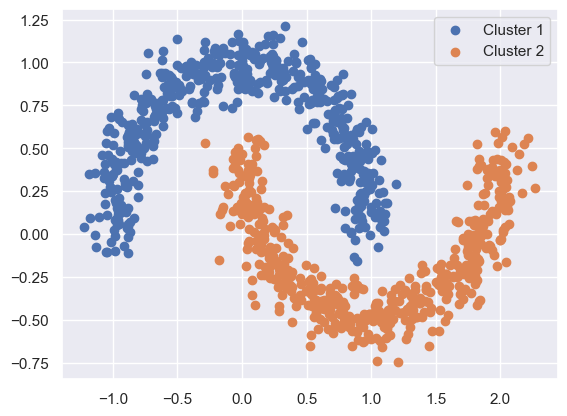

In [2]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

X, y = make_moons(
    n_samples=1000,
    noise=0.1,
    random_state=42
)

cluster1 = X[y == 0]
cluster2 = X[y == 1]

plt.scatter(*cluster1.T, label="Cluster 1")
plt.scatter(*cluster2.T, label="Cluster 2")
plt.legend()
plt.show()

# Split training and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
)

## Bagging

In the following, we define an ensemble classifier consisting of 500 decision trees, and it will be trained on 100 samples.

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    # It is an esemble of 500 decision trees
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    
    # Train on 100 samples
    max_samples=100,
    
    # If set true, then the bagging technique is in use
    bootstrap=True,
    
    # Use all available CPU cores
    n_jobs=-1,
    
    # For reproduction
    random_state=42
)

Fit the model:

In [4]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

Evaluate the prediction accuracy on the test dataset:

In [5]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.985

## Out-of-Bag Evaluation

Suppose there are in total $n$ samples in the training dataset.